In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from __future__ import print_function
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize 
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
raw_data = pd.read_csv('wine_data.csv')
raw_data

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20995,9.7,1.020,0.91,50.00,0.412,114.6,181.7,1.02085,3.30,0.89,12.0,9
20996,10.2,0.610,0.88,53.80,0.250,62.4,204.7,1.02776,3.52,1.14,9.7,9
20997,13.4,0.460,1.04,52.10,0.449,63.0,273.5,1.02618,2.89,1.76,9.3,9
20998,6.6,1.030,1.09,25.30,0.138,179.8,295.0,1.02476,2.94,1.54,12.9,9


<Axes: >

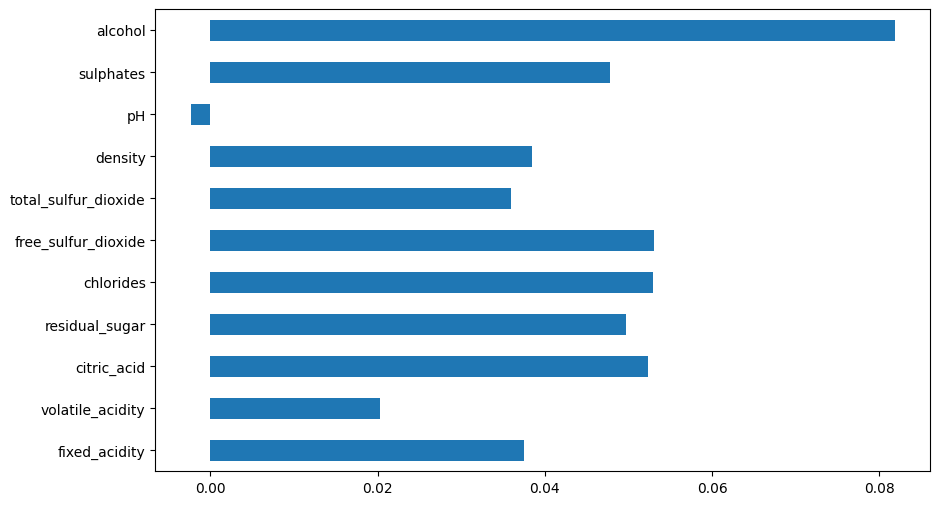

In [3]:
correlation_values = raw_data.corr()['quality'].drop('quality')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [4]:
y = raw_data[['quality']].astype('float32')
X = raw_data.values
X

array([[11.6  ,  0.58 ,  0.66 , ...,  0.57 ,  9.   ,  3.   ],
       [10.4  ,  0.61 ,  0.49 , ...,  0.63 ,  8.4  ,  3.   ],
       [ 7.4  ,  1.185,  0.   , ...,  0.54 , 10.7  ,  3.   ],
       ...,
       [13.4  ,  0.46 ,  1.04 , ...,  1.76 ,  9.3  ,  9.   ],
       [ 6.6  ,  1.03 ,  1.09 , ...,  1.54 , 12.9  ,  9.   ],
       [ 9.3  ,  0.93 ,  1.32 , ...,  1.42 , 13.   ,  9.   ]],
      shape=(21000, 12))

In [5]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=42)

In [6]:
model = DecisionTreeRegressor(criterion='squared_error',max_depth=2,random_state=42)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [7]:
mse_score = mean_squared_error(y_test, y_predict)
print('MSE score : {0:.3f}'.format(mse_score))

r2_score = model.score(X_test,y_test)
print('R^2 score : {0:.3f}'.format(r2_score))

MSE score : 0.216
R^2 score : 0.945
